In [2]:
pip install xgboost

  Using cached xgboost-1.3.3-py3-none-win_amd64.whl (95.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install graphviz

In [5]:
pip install seaborn

  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
#import modules and necessary dependencies
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [7]:
#read the csv file
df = pd.read_csv(os.path.join("AB_NYC_2019.csv"))
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
#Check the size of the dataset
df.shape

(48895, 16)

In [9]:
#Check data type
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [10]:
#analyze the test variable
df["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

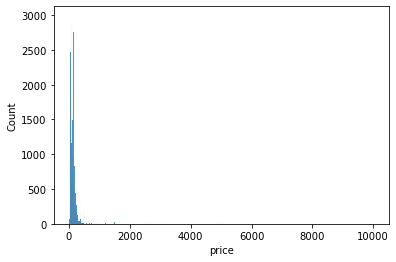

In [11]:
#check the range of the price
p1=sns.histplot(df["price"])

In [12]:
#check the size of prices above 1000
df.loc[df["price"]>1000].shape

(239, 16)

In [13]:
#drop the rows with price above 1000
df=df[~(df["price"]>1000)]

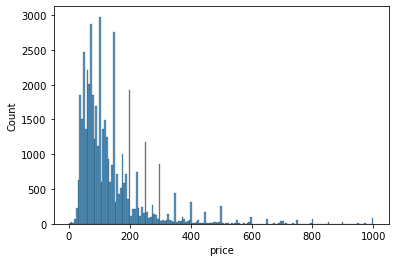

In [14]:
#check for normal distribution
p2=sns.histplot(df["price"])

In [15]:
#final size of the dataset
df.shape

(48656, 16)

In [16]:
#get the summary statistics
df["price"].describe()

count    48656.000000
mean       141.279842
std        116.737468
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       1000.000000
Name: price, dtype: float64

In [17]:
#drop the columns that is not relevant
df.drop(["id", "name", "host_name","host_id","latitude", "longitude","neighbourhood","last_review"], axis=1, inplace=True)

In [18]:
#check for any missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48656 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48656 non-null  object 
 1   room_type                       48656 non-null  object 
 2   price                           48656 non-null  int64  
 3   minimum_nights                  48656 non-null  int64  
 4   number_of_reviews               48656 non-null  int64  
 5   reviews_per_month               38736 non-null  float64
 6   calculated_host_listings_count  48656 non-null  int64  
 7   availability_365                48656 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 3.3+ MB


In [19]:
#fill in the missing values with appropriate data type

df.fillna({"reviews_per_month":0}, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48656 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48656 non-null  object 
 1   room_type                       48656 non-null  object 
 2   price                           48656 non-null  int64  
 3   minimum_nights                  48656 non-null  int64  
 4   number_of_reviews               48656 non-null  int64  
 5   reviews_per_month               48656 non-null  float64
 6   calculated_host_listings_count  48656 non-null  int64  
 7   availability_365                48656 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 3.3+ MB


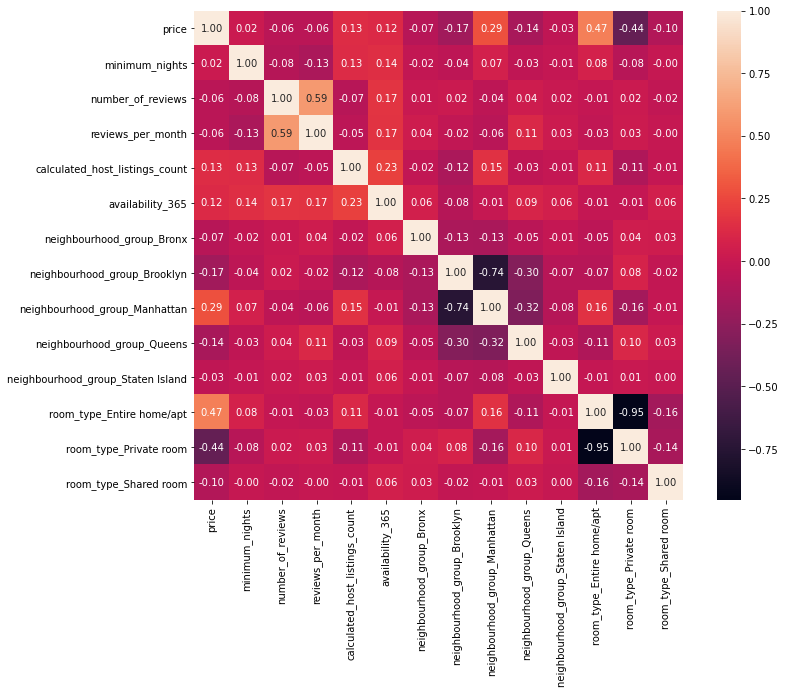

In [21]:
#correlation between the target and the features
df2=pd.get_dummies(df)

corr = df2.corr()
f, ax = plt.subplots(figsize=(12,9))
,
sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=corr.columns, xticklabels=corr.columns)
plt.show()

In [22]:
#get the features and the target
X=df[["reviews_per_month","neighbourhood_group","room_type","availability_365"]]

In [23]:
#convert strings into numbers and assign price as the target
X= pd.get_dummies(X)
y=df["price"]

In [24]:
#check the size 
print(X.shape)
print(y.shape)

(48656, 10)
(48656,)


In [25]:
#split the dataset into  80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

<AxesSubplot:ylabel='Count'>

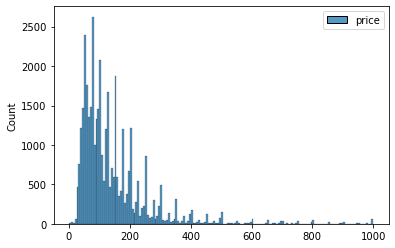

In [26]:
sns.histplot(pd.DataFrame(y_train))

<AxesSubplot:ylabel='Count'>

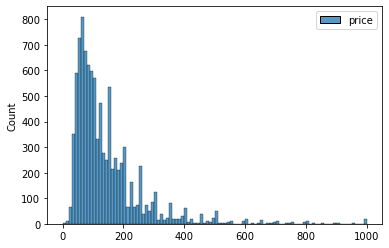

In [27]:
sns.histplot(pd.DataFrame(y_test))

In [28]:
#build dmatrices form the datasets
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [29]:
# "Learn" the mean from the training data
mean_train = np.mean(y_train)
# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train
# Compute MAE

rmse = np.sqrt(mean_squared_error(y_test, baseline_predictions))
print("Baseline RMSE: %f" % (rmse))

Baseline RMSE: 119.176793


In [30]:
#set the paramaters with default values
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight':1,
    'eta':.1,
    'subsample': 0.1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror'    
}

In [31]:
#add the evaluation metric root mean squared error
params['eval_metric'] = "rmse"

In [32]:
#set the max boosting rounds
num_boost_round = 100

In [33]:
#pass more parameters on top of the default parameters
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-rmse:172.48932
[1]	Test-rmse:161.31340
[2]	Test-rmse:151.75235
[3]	Test-rmse:143.43509
[4]	Test-rmse:136.30780
[5]	Test-rmse:130.01327
[6]	Test-rmse:124.66099
[7]	Test-rmse:120.23380
[8]	Test-rmse:116.35373
[9]	Test-rmse:113.15453
[10]	Test-rmse:110.35660
[11]	Test-rmse:108.09039
[12]	Test-rmse:106.09675
[13]	Test-rmse:104.60892
[14]	Test-rmse:103.41572
[15]	Test-rmse:102.40702
[16]	Test-rmse:101.46967
[17]	Test-rmse:100.73201
[18]	Test-rmse:100.11056
[19]	Test-rmse:99.61601
[20]	Test-rmse:99.16245
[21]	Test-rmse:98.84645
[22]	Test-rmse:98.61339
[23]	Test-rmse:98.31979
[24]	Test-rmse:98.20873
[25]	Test-rmse:98.01857
[26]	Test-rmse:97.87064
[27]	Test-rmse:97.69711
[28]	Test-rmse:97.62524
[29]	Test-rmse:97.60362
[30]	Test-rmse:97.52351
[31]	Test-rmse:97.47601
[32]	Test-rmse:97.46495
[33]	Test-rmse:97.44997
[34]	Test-rmse:97.37045
[35]	Test-rmse:97.31905
[36]	Test-rmse:97.31741
[37]	Test-rmse:97.38242
[38]	Test-rmse:97.33105
[39]	Test-rmse:97.32591
[40]	Test-rmse:97.34395
[41]	Te

In [34]:
# get the best RMSE
print("Best RMSE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

Best RMSE: 97.14 with 49 rounds


In [35]:
#run cross validation on the training data to get the rmse score
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=3,
    metrics={'rmse'},
    early_stopping_rounds=10
)

cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,169.502543,0.645983,169.562973,0.802797
1,158.348348,0.549134,158.449997,0.787535
2,148.759399,0.629480,148.990433,0.750107
3,140.360459,0.480242,140.692861,0.912381
4,133.009822,0.463388,133.400569,1.000103
5,126.655813,0.516462,127.189308,0.990451
6,121.408824,0.450558,122.045855,1.043342
7,116.950063,0.546843,117.686953,1.076603
8,113.176183,0.617653,114.008685,1.092922
9,109.932063,0.671682,110.880666,1.065767


In [36]:
#get the min rmse score
cv_results['test-rmse-mean'].min()

96.575152

In [37]:
#set the range of max_depth and min_child_weight
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(2,15)
    for min_child_weight in range(2,15)
]

In [38]:
%%time

#set the initial best params and RMSE
min_rmse = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=3,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best RMSE
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {},RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with max_depth=2, min_child_weight=2
	RMSE 96.59261599999998 for 95 rounds
CV with max_depth=2, min_child_weight=3
	RMSE 96.58299 for 95 rounds
CV with max_depth=2, min_child_weight=4
	RMSE 96.58329033333332 for 95 rounds
CV with max_depth=2, min_child_weight=5
	RMSE 96.58323933333334 for 95 rounds
CV with max_depth=2, min_child_weight=6
	RMSE 96.57098900000001 for 95 rounds
CV with max_depth=2, min_child_weight=7
	RMSE 96.569758 for 95 rounds
CV with max_depth=2, min_child_weight=8
	RMSE 96.57951066666668 for 95 rounds
CV with max_depth=2, min_child_weight=9
	RMSE 96.59863566666667 for 95 rounds
CV with max_depth=2, min_child_weight=10
	RMSE 96.59424833333333 for 95 rounds
CV with max_depth=2, min_child_weight=11
	RMSE 96.59400166666667 for 95 rounds
CV with max_depth=2, min_child_weight=12
	RMSE 96.590253 for 95 rounds
CV with max_depth=2, min_child_weight=13
	RMSE 96.60256433333332 for 95 rounds
CV with max_depth=2, min_child_weight=14
	RMSE 96.57839733333333 for 95 rounds
CV wit

	RMSE 97.10168933333334 for 34 rounds
CV with max_depth=10, min_child_weight=5
	RMSE 97.112826 for 31 rounds
CV with max_depth=10, min_child_weight=6
	RMSE 97.045929 for 34 rounds
CV with max_depth=10, min_child_weight=7
	RMSE 96.83690633333333 for 34 rounds
CV with max_depth=10, min_child_weight=8
	RMSE 96.79689533333334 for 34 rounds
CV with max_depth=10, min_child_weight=9
	RMSE 96.70373266666667 for 34 rounds
CV with max_depth=10, min_child_weight=10
	RMSE 96.63162466666665 for 34 rounds
CV with max_depth=10, min_child_weight=11
	RMSE 96.570905 for 34 rounds
CV with max_depth=10, min_child_weight=12
	RMSE 96.44156400000001 for 42 rounds
CV with max_depth=10, min_child_weight=13
	RMSE 96.47787233333334 for 45 rounds
CV with max_depth=10, min_child_weight=14
	RMSE 96.38595066666666 for 44 rounds
CV with max_depth=11, min_child_weight=2
	RMSE 97.71009066666666 for 31 rounds
CV with max_depth=11, min_child_weight=3
	RMSE 97.37831366666666 for 36 rounds
CV with max_depth=11, min_child_w

In [39]:
#update the params
params['max_depth'] = 4
params['min_child_weight'] =14

In [40]:
#set the range for subsample and colsample
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,10)]
    for colsample in [i/10. for i in range(5,10)]
]

In [41]:
%%time

#set the initial best params and RMSE
min_rmse = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=3,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample,colsample)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with subsample=0.9, colsample=0.9
	RMSE 95.69102733333334 for 98 rounds
CV with subsample=0.9, colsample=0.8
	RMSE 95.74845133333334 for 99 rounds
CV with subsample=0.9, colsample=0.7
	RMSE 95.810951 for 97 rounds
CV with subsample=0.9, colsample=0.6
	RMSE 95.83796666666666 for 99 rounds
CV with subsample=0.9, colsample=0.5
	RMSE 95.87987766666667 for 99 rounds
CV with subsample=0.8, colsample=0.9
	RMSE 95.70293933333333 for 99 rounds
CV with subsample=0.8, colsample=0.8
	RMSE 95.74071733333334 for 99 rounds
CV with subsample=0.8, colsample=0.7
	RMSE 95.73309833333333 for 99 rounds
CV with subsample=0.8, colsample=0.6
	RMSE 95.82763933333332 for 97 rounds
CV with subsample=0.8, colsample=0.5
	RMSE 95.90214300000001 for 99 rounds
CV with subsample=0.7, colsample=0.9
	RMSE 95.71941866666667 for 77 rounds
CV with subsample=0.7, colsample=0.8
	RMSE 95.705147 for 99 rounds
CV with subsample=0.7, colsample=0.7
	RMSE 95.75454966666666 for 97 rounds
CV with subsample=0.7, colsample=0.6
	RMS

In [42]:
#update the params
params['subsample'] = 0.9
params['colsample_bytree'] = 0.9

In [43]:
%%time

#set the initial best params and RMSE
min_rmse = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .02, .03]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=3,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = eta
print("Best params: {}, RMSE: {}".format(best_params, min_rmse))

CV with eta=0.3
	RMSE 95.796987 for 22 rounds
CV with eta=0.2
	RMSE 95.82526133333334 for 63 rounds
CV with eta=0.1
	RMSE 95.69102733333334 for 98 rounds
CV with eta=0.05
	RMSE 95.85292566666665 for 99 rounds
CV with eta=0.01
	RMSE 112.20454166666667 for 99 rounds
CV with eta=0.02
	RMSE 98.604243 for 99 rounds
CV with eta=0.03
	RMSE 96.44154099999999 for 99 rounds
Best params: 0.1, RMSE: 95.69102733333334
Wall time: 9.36 s


In [78]:
#update the params
params["eta"] = 0.1

In [79]:
#check the params
params

{'max_depth': 4,
 'min_child_weight': 14,
 'eta': 0.1,
 'subsample': 0.9,
 'colsample_bytree': 0.9,
 'objective': 'reg:squarederror',
 'eval_metric': 'rmse'}

In [80]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-rmse:172.35135
[1]	Test-rmse:161.12834
[2]	Test-rmse:151.33762
[3]	Test-rmse:142.91165
[4]	Test-rmse:135.65260
[5]	Test-rmse:129.49663
[6]	Test-rmse:124.33415
[7]	Test-rmse:119.85471
[8]	Test-rmse:116.13865
[9]	Test-rmse:112.92520
[10]	Test-rmse:110.31525
[11]	Test-rmse:108.07820
[12]	Test-rmse:106.18327
[13]	Test-rmse:104.65745
[14]	Test-rmse:103.38193
[15]	Test-rmse:102.35328
[16]	Test-rmse:101.45240
[17]	Test-rmse:100.72241
[18]	Test-rmse:100.13258
[19]	Test-rmse:99.62241
[20]	Test-rmse:99.19840
[21]	Test-rmse:98.85449
[22]	Test-rmse:98.56890
[23]	Test-rmse:98.31708
[24]	Test-rmse:98.09794
[25]	Test-rmse:97.93542
[26]	Test-rmse:97.75916
[27]	Test-rmse:97.62056
[28]	Test-rmse:97.50162
[29]	Test-rmse:97.40720
[30]	Test-rmse:97.33394
[31]	Test-rmse:97.25136
[32]	Test-rmse:97.17226
[33]	Test-rmse:97.11078
[34]	Test-rmse:97.06561
[35]	Test-rmse:97.03047
[36]	Test-rmse:96.99729
[37]	Test-rmse:96.95756
[38]	Test-rmse:96.93839
[39]	Test-rmse:96.90937
[40]	Test-rmse:96.89370
[41]	Te

In [81]:
print("Best RMSE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))

Best RMSE: 96.51 in 100 rounds


In [82]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[0]	Test-rmse:172.35135
[1]	Test-rmse:161.12834
[2]	Test-rmse:151.33762
[3]	Test-rmse:142.91165
[4]	Test-rmse:135.65260
[5]	Test-rmse:129.49663
[6]	Test-rmse:124.33415
[7]	Test-rmse:119.85471
[8]	Test-rmse:116.13865
[9]	Test-rmse:112.92520
[10]	Test-rmse:110.31525
[11]	Test-rmse:108.07820
[12]	Test-rmse:106.18327
[13]	Test-rmse:104.65745
[14]	Test-rmse:103.38193
[15]	Test-rmse:102.35328
[16]	Test-rmse:101.45240
[17]	Test-rmse:100.72241
[18]	Test-rmse:100.13258
[19]	Test-rmse:99.62241
[20]	Test-rmse:99.19840
[21]	Test-rmse:98.85449
[22]	Test-rmse:98.56890
[23]	Test-rmse:98.31708
[24]	Test-rmse:98.09794
[25]	Test-rmse:97.93542
[26]	Test-rmse:97.75916
[27]	Test-rmse:97.62056
[28]	Test-rmse:97.50162
[29]	Test-rmse:97.40720
[30]	Test-rmse:97.33394
[31]	Test-rmse:97.25136
[32]	Test-rmse:97.17226
[33]	Test-rmse:97.11078
[34]	Test-rmse:97.06561
[35]	Test-rmse:97.03047
[36]	Test-rmse:96.99729
[37]	Test-rmse:96.95756
[38]	Test-rmse:96.93839
[39]	Test-rmse:96.90937
[40]	Test-rmse:96.89370
[41]	Te

In [83]:
np.sqrt(mean_squared_error(best_model.predict(dtest), y_test))

96.50739186740037

In [86]:
best_model.save_model("my_model.model")

In [87]:
loaded_model = xgb.Booster()
loaded_model.load_model("my_model.model")

y_test_pred =loaded_model.predict(dtest)
print(f'true = {np.array(y_test)[:5]}')
print(f'pred = {y_test_pred[:5]}')


true = [275 500 275  75 450]
pred = [172.94968 194.13272 183.92776 153.39665 171.57227]


In [88]:
from sklearn.metrics import r2_score

print(r2_score(y_test,y_test_pred))

0.3441985469494614


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

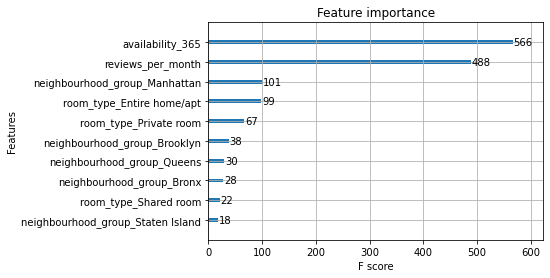

In [89]:
from xgboost import plot_importance, plot_tree
plot_importance(loaded_model,ax=plt.gca())

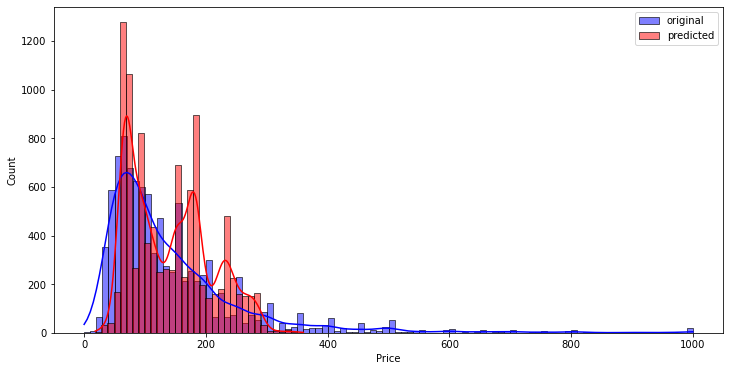

In [90]:
fig1 = plt.figure(figsize=(12, 6))

sns.histplot( y_test, color="blue", label="original", kde= True)
sns.histplot(y_test_pred, color="red", label="predicted", kde=True)

plt.xlabel("Price")
plt.legend()



In [94]:
fig1.savefig('Graphs/XGBoost_Comparision.png')

In [91]:
y_train_pred = loaded_model.predict(dtrain)

test = pd.DataFrame({"test prediction": y_test_pred, "test": y_test})
train =pd.DataFrame({"train prediction": y_train_pred, "train": y_train})

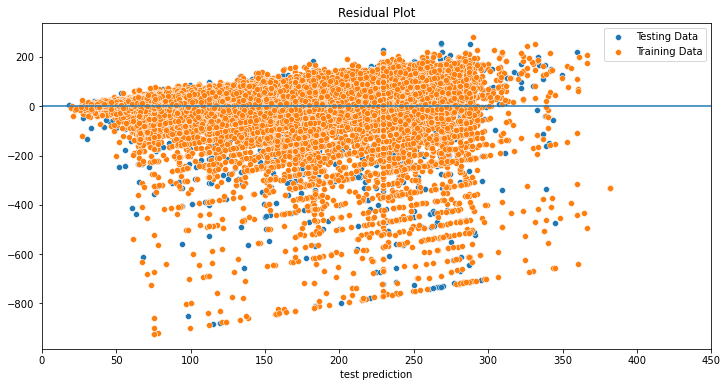

In [95]:
fig2 = plt.figure(figsize=(12, 6))

sns.scatterplot(data = test, x=test["test prediction"], y=test["test prediction"] - test["test"], label="Testing Data")
sns.scatterplot(data = train, x=train["train prediction"], y=train["train prediction"] - train["train"], label="Training Data")


#plt.legend()
plt.hlines(y=0, xmin=test["test"].min(), xmax=test["test"].max())
plt.xlim([0,450])

plt.title("Residual Plot")
plt.show()

In [96]:
fig2.savefig('Graphs/XGBoost_Comparision2.png')

In [ ]:
import joblib
file = "xbgmodel.h5"
joblib.dump(best_model, file)